- The **demand** for a product or service keeps **changing** from time to time.

- No business can improve its financial performance without **estimating customer demand** and **future sales** of products/services accurately.

**Supplement Sales Prediction**
Your Client **WOMart** is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

**Your task is to predict the store sales for each store in the test set for the next two months.**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# To supress all the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
upload = files.upload()

Saving TRAIN.csv to TRAIN.csv


In [ ]:
# Reading the training data
import io
sales_df = pd.read_csv(io.BytesIO(upload['TRAIN.csv']))
sales_df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [ ]:
# This will give additional information about the train dataframe
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [ ]:
# This will show the number of null values in each feature
sales_df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [ ]:
sales_df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


There are no Null values in the data frame.


There seems to be an outlier in the number of orders there by Sales also.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

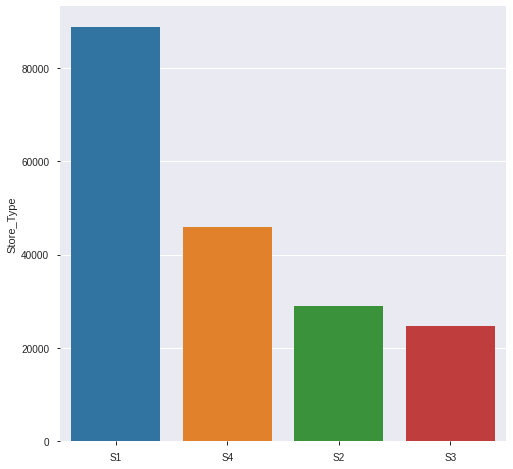

In [ ]:
sales_df['Store_Type'].value_counts()
plt.figure(figsize=(8, 8))
sns.barplot(x=sales_df.Store_Type.value_counts().index, y=sales_df.Store_Type.value_counts(), data=sales_df)


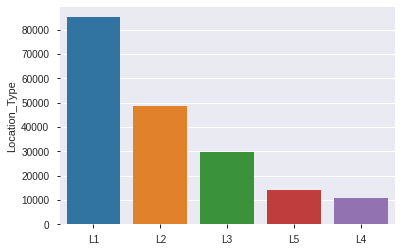

In [ ]:
sales_df['Location_Type'].value_counts()
sns.barplot(x=sales_df.Location_Type.value_counts().index, y=sales_df.Location_Type.value_counts(), data=sales_df)

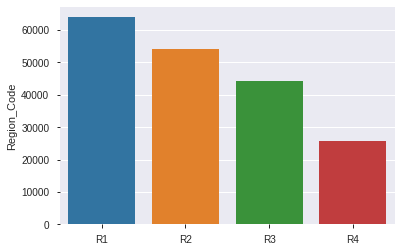

In [ ]:
sales_df['Region_Code'].value_counts()
sns.barplot(x=sales_df.Region_Code.value_counts().index, y=sales_df.Region_Code.value_counts(), data=sales_df)

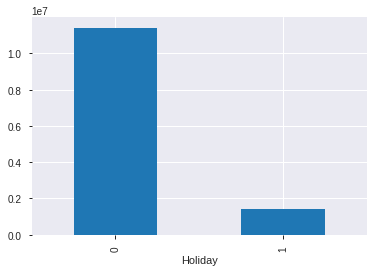

In [ ]:
sales_df.groupby('Holiday')['#Order'].agg('sum').plot(kind='bar')

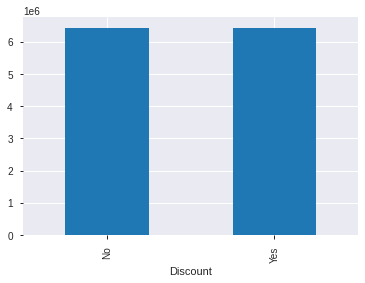

In [ ]:
sales_df.groupby('Discount')['#Order'].agg('sum').plot(kind='bar')

In [ ]:
sales_df = pd.get_dummies(data = sales_df, columns=['Location_Type', 'Store_Type', 'Region_Code'])

In [ ]:
sales_df = pd.get_dummies(data = sales_df, columns=['Discount'])

In [ ]:
# Creating Day column in the sales_df after extracting the information from Date column
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Day'] = sales_df['Date'].dt.day

In [ ]:
sales_df.drop(columns=['ID', 'Date'], inplace=True)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Store_id          188340 non-null  int64  
 1   Holiday           188340 non-null  int64  
 2   #Order            188340 non-null  int64  
 3   Sales             188340 non-null  float64
 4   Location_Type_L1  188340 non-null  uint8  
 5   Location_Type_L2  188340 non-null  uint8  
 6   Location_Type_L3  188340 non-null  uint8  
 7   Location_Type_L4  188340 non-null  uint8  
 8   Location_Type_L5  188340 non-null  uint8  
 9   Store_Type_S1     188340 non-null  uint8  
 10  Store_Type_S2     188340 non-null  uint8  
 11  Store_Type_S3     188340 non-null  uint8  
 12  Store_Type_S4     188340 non-null  uint8  
 13  Region_Code_R1    188340 non-null  uint8  
 14  Region_Code_R2    188340 non-null  uint8  
 15  Region_Code_R3    188340 non-null  uint8  
 16  Region_Code_R4    18

In [ ]:
# Creating the feature matrix by removing the target variable
X = sales_df.drop(['Sales'], axis=1)
X.head()

,Store_id,Holiday,#Order,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Day
0,1,1,9,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1
1,253,1,60,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1
2,252,1,42,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1
3,251,1,23,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1
4,250,1,62,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1


In [ ]:
# Creating the feature matrix by removing the target variable
X1 = sales_df.drop(['Sales','#Order'], axis=1)
X1.head()

,Store_id,Holiday,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Day
0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1
1,253,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1
2,252,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1
3,251,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1
4,250,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1


In [ ]:
# Creating the target vector
y = sales_df['Sales']
y.head()

0     7011.84
1    51789.12
2    36868.20
3    19715.16
4    45614.52
Name: Sales, dtype: float64

In [ ]:
# For Data Model Development
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# For Machine Learning Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Using scikit-learn's train_test_split function to split the dataset into train and test sets.
# 80% of the data will be in the train set and 20% in the test set, as specified by test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Using scikit-learn's train_test_split function to split the dataset into train and test sets.
# 80% of the data will be in the train set and 20% in the test set, as specified by test_size=0.2
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [ ]:
# Checking the shapes of the training and test sets.
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (150672, 19) (150672,)
Testing Data Shape: (37668, 19) (37668,)


In [ ]:
# Checking the shapes of the training and test sets.
print('Training Data Shape:', X1_train.shape, y_train.shape)
print('Testing Data Shape:', X1_test.shape, y_test.shape)

Training Data Shape: (150672, 18) (150672,)
Testing Data Shape: (37668, 18) (37668,)


In [ ]:
# A helper function to display the scores along with the mean and standard deviation of scores.
def display_scores(scores):
    scores_rmse = np.sqrt(-scores)
    print('Scores:', scores_rmse)
    print('Mean:', scores_rmse.mean())
    print('Standard Deviation:', scores_rmse.std())

In [ ]:
# Linear Regression
lr = LinearRegression()

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
display_scores(scores)

Scores: [5025.90183892 4998.87891278 5034.62688918 5055.99815889 5083.04251372]
Mean: 5039.689662697684
Standard Deviation: 28.3784770884497


**Observations:**

- After perfoming **5-fold** cross-validation on our Baseline Linear Regression model, we get a mean **RMSE** score of **5039.68**

- This means that, our predicted daily sales might have an **error** of more than **5000** in them.

- This is not a good score at all, and we can't use this model in production.

- The **standard deviation** of **28** means that our model is performing almost similarly on each fold it was tested on, and is **generalizing** well on unseen data.

In [ ]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
display_scores(scores)

Scores: [5836.11997505 5938.53534572 5843.74682396 5746.80606568 5817.74139871]
Mean: 5836.5899218230825
Standard Deviation: 61.41778113720644


In [ ]:
# Creating a Random Forest model.
rf = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')

In [ ]:
display_scores(scores)

Scores: [4531.07945289 4558.91414774 4548.87774338 4527.8255192  4556.53627076
 4528.79518864 4423.05352535 4566.18309972 4508.76901078 4550.19860495]
Mean: 4530.02325633996
Standard Deviation: 39.38199364912452


In [ ]:
# Fitting the baseline Random Forest model on the entire train set to obtain the feature importances of each feature. 
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf1 = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)

In [ ]:
scores1 = cross_val_score(estimator=rf1, X=X1_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
display_scores(scores1)

Scores: [12081.47865934 11905.88903646 11938.50296524 11832.70881784
 11992.54879459]
Mean: 11950.22565469339
Standard Deviation: 83.58464393291646


In [ ]:
rf1.fit(X1_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# Checking the feature importances of various features.
# Sorting the importances by descending order (lowest importance at the bottom).
for score, name in sorted(zip(rf.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of #Order : 90.12187838549369 %
Feature importance of Store_id : 2.4089087257921085 %
Feature importance of Day : 2.1712842770465133 %
Feature importance of Location_Type_L2 : 0.8323342742076452 %
Feature importance of Store_Type_S4 : 0.6809137943287299 %
Feature importance of Region_Code_R1 : 0.6321919590151095 %
Feature importance of Discount_No : 0.584075447173882 %
Feature importance of Discount_Yes : 0.5011067657674342 %
Feature importance of Location_Type_L1 : 0.48051276139380583 %
Feature importance of Holiday : 0.4187914112811726 %
Feature importance of Region_Code_R3 : 0.2726159580214714 %
Feature importance of Store_Type_S1 : 0.1805146708301919 %
Feature importance of Store_Type_S2 : 0.1647994274514942 %
Feature importance of Region_Code_R2 : 0.15565892418543245 %
Feature importance of Store_Type_S3 : 0.11754175843963566 %
Feature importance of Region_Code_R4 : 0.10644765335873102 %
Feature importance of Location_Type_L5 : 0.09090903877826237 %
Feature impo

Text(0.5, 1.0, 'Feature Importance of each Feature')

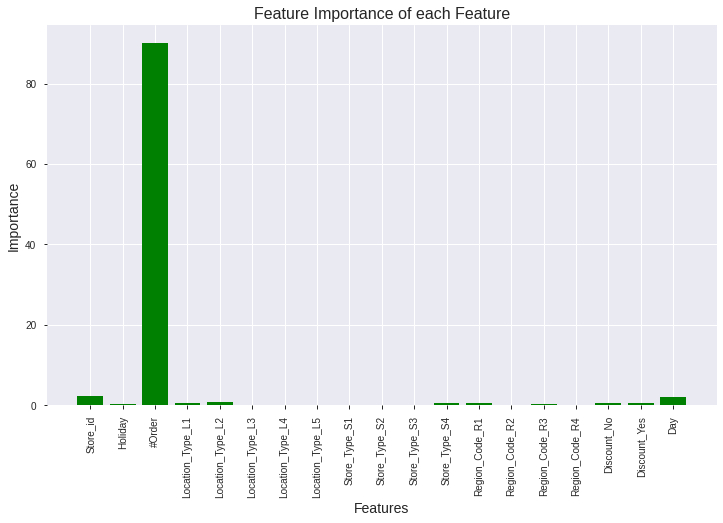

In [ ]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(X_train.columns, rf.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

In [ ]:
X_train_essential = X_train[['Store_id', '#Order', 'Day', 'Location_Type_L2', 'Store_Type_S4', 'Region_Code_R1', 'Discount_No','Discount_Yes' ]]
X_train_essential.head()

,Store_id,#Order,Day,Location_Type_L2,Store_Type_S4,Region_Code_R1,Discount_No,Discount_Yes
50438,237,45,19,0,0,0,1,0
178932,129,83,6,0,0,1,1,0
173991,57,101,22,0,1,1,1,0
14666,276,79,10,0,0,0,0,1
30679,130,55,26,0,0,0,1,0


In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=rf, X=X_train_essential, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
display_scores(scores)

Scores: [4742.27636272 4759.71476075 4786.00069655 4718.62486677 4735.95027602]
Mean: 4748.513392562045
Standard Deviation: 22.894650124327704


In [ ]:
X1_train_essential = X_train[['Store_id', 'Day', 'Location_Type_L2', 'Store_Type_S4', 'Region_Code_R1', 'Discount_No','Discount_Yes' ]]
X1_train_essential.head()

,Store_id,Day,Location_Type_L2,Store_Type_S4,Region_Code_R1,Discount_No,Discount_Yes
50438,237,19,0,0,0,1,0
178932,129,6,0,0,1,1,0
173991,57,22,0,1,1,1,0
14666,276,10,0,0,0,0,1
30679,130,26,0,0,0,1,0


In [ ]:
X2_train_essential = X_train[[ 'Day', 'Location_Type_L2', 'Store_Type_S4', 'Region_Code_R1', 'Discount_No','Discount_Yes', 'Location_Type_L1' ]]
X2_train_essential.head()

,Day,Location_Type_L2,Store_Type_S4,Region_Code_R1,Discount_No,Discount_Yes,Location_Type_L1
50438,19,0,0,0,1,0,0
178932,6,0,0,1,1,0,1
173991,22,0,1,1,1,0,1
14666,10,0,0,0,0,1,1
30679,26,0,0,0,1,0,1


In [ ]:
# Performing K-fold Cross-validation for 10 folds.
scores2 = cross_val_score(estimator=rf, X=X2_train_essential, y=y_train, cv=10, scoring='neg_mean_squared_error')

In [ ]:
display_scores(scores2)

Scores: [12709.05040822 13067.72936688 12775.30232984 12835.58819973
 12897.42819993 12684.3618979  12438.95296385 12925.88218892
 12707.63228744 12892.76727191]
Mean: 12793.469511461259
Standard Deviation: 163.58610511379493


In [ ]:
param_grid = [{'n_estimators': [10, 20, 30], 'max_depth': [None, 2, 3, 5], 'max_features': ['auto', 2, 4]}]

In [ ]:
temp_rf = RandomForestRegressor(random_state=0, n_jobs=-1)

In [ ]:
grid_search = GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [ ]:
%%time
grid_search.fit(X_train_essential, y_train)

CPU times: user 20.8 s, sys: 866 ms, total: 21.7 s
Wall time: 4min 26s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

In [ ]:
# Calculating the best RMSE score found by Grid Search 
np.sqrt(-grid_search.best_score_)

4625.852507546973

In [ ]:
# Creating the final random forest model from the grid search's best estimator.
final_rf = grid_search.best_estimator_

In [ ]:
# Fitting the final model with training set
final_rf.fit(X_train_essential, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
temp_rf1 = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
temp_rf2 = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
grid_search1 = GridSearchCV(estimator=temp_rf1, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [ ]:
grid_search2 = GridSearchCV(estimator=temp_rf2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

In [ ]:
%%time
grid_search1.fit(X1_train_essential, y_train)

CPU times: user 12 s, sys: 590 ms, total: 12.6 s
Wall time: 2min 58s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [ ]:
%%time
grid_search2.fit(X2_train_essential, y_train)

CPU times: user 8.69 s, sys: 1.14 s, total: 9.83 s
Wall time: 3min 56s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
final_rf1 = grid_search1.best_estimator_

In [ ]:
final_rf2 = grid_search2.best_estimator_

In [ ]:
# Fitting the final model with training set
final_rf1.fit(X1_train_essential, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
final_rf2.fit(X2_train_essential, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# Creating the test set with only the essential features
X_test_essential = X_test[['Store_id', '#Order', 'Day', 'Location_Type_L2', 'Store_Type_S4', 'Region_Code_R1', 'Discount_No','Discount_Yes' ]]
X_test_essential.head()

,Store_id,#Order,Day,Location_Type_L2,Store_Type_S4,Region_Code_R1,Discount_No,Discount_Yes
2393,287,54,7,0,0,1,1,0
28079,261,111,18,1,1,1,0,1
31424,112,59,28,0,0,0,0,1
93670,6,67,14,0,1,1,1,0
80507,341,60,9,0,0,0,1,0


In [ ]:
# Making predictions on the train set
y_train_pred = final_rf.predict(X_train_essential)

In [ ]:
# Making predictions on the test set
y_test_pred = final_rf.predict(X_test_essential)

In [ ]:
pd.DataFrame({'Actual Test Set Values': y_test[0:5].values, 'Predicted Test Set Values': y_test_pred[0:5]})

,Actual Test Set Values,Predicted Test Set Values
0,32667.00,28523.200
1,70352.25,67884.700
2,34824.00,37632.200
3,34365.00,34360.302
4,37107.00,34886.875


In [ ]:
# Estimating RMSE on Train & Test Data
print('RMSE for Train Set:', np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)), decimals=2))
print('RMSE for Test Set:', np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)), decimals=2))

RMSE for Train Set: 1933.04
RMSE for Test Set: 4606.63


In [ ]:
# Creating a helper function to plot the actual and predicted values for train and test sets.
def plot_score(y_train, y_train_pred, y_test, y_test_pred):
  '''
  Plot acutal and predicted values for train & test data
  y_train: actual y_train values
  y_train_pred: predicted values of y_train
  y_test: actual y_test values
  y_test_pred: predicted values of y_test
  '''
  plt.figure(figsize=[16, 6])
  plt.subplot(1, 2, 1)
  sns.regplot(x=y_train, y=y_train_pred, color='red')
  plt.xlabel('Actual', size=14)
  plt.ylabel('Predicted', size=14)
  plt.title('For Train Data', size=16)

  plt.subplot(1, 2, 2)
  sns.regplot(x=y_test, y=y_test_pred, color='green')
  plt.xlabel('Actual', size=14)
  plt.ylabel('Predicted', size=14)
  plt.title('For Test Data', size=16)
  plt.show()

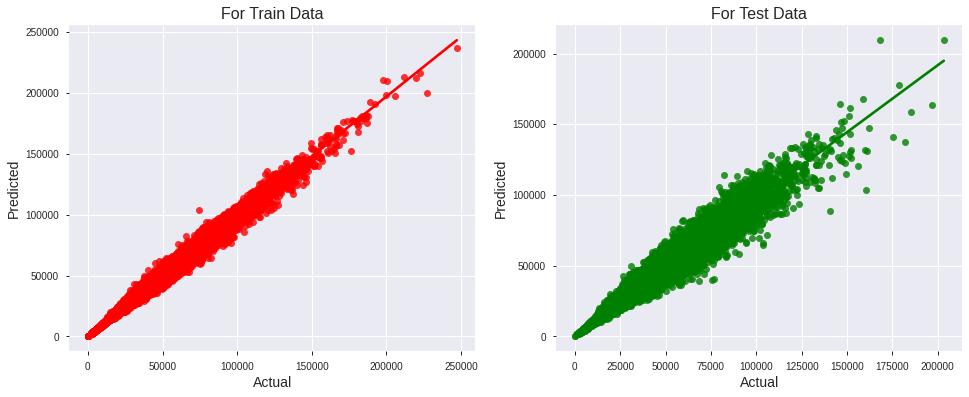

In [ ]:
# Plotting Actual vs Predicted Values
# This will take some time
plot_score(y_train, y_train_pred, y_test, y_test_pred)

In [ ]:
from google.colab import files
upload = files.upload()

Saving TEST_FINAL.csv to TEST_FINAL.csv


In [ ]:
# Reading the Test Final data
import io
sales_df_tf = pd.read_csv(io.BytesIO(upload['TEST_FINAL.csv']))
sales_df_tf

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


In [ ]:
sales_df_tf = pd.get_dummies(data = sales_df_tf, columns=['Location_Type', 'Store_Type', 'Region_Code','Discount'])

In [ ]:
sales_df_tf['Date'] = pd.to_datetime(sales_df_tf['Date'])
sales_df_tf['Day'] = sales_df_tf['Date'].dt.day

In [ ]:
sales_df_tf.drop(columns=['ID', 'Date'], inplace=True)

In [ ]:
sales_df_tf

,Store_id,Holiday,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Day
0,171,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1
1,172,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,173,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1
3,174,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
4,170,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,186,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,31
22261,11,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,31
22262,185,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,31
22263,69,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,31


In [ ]:
# Making predictions on the test set
y_test_pred_tf = rf1.predict(sales_df_tf)

In [ ]:
from google.colab import files
pd.DataFrame(y_test_pred_tf).to_csv('y_test_pred_tf_rf.csv') 
files.download('y_test_pred_tf_rf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sales_df_tf1 = sales_df_tf[['Store_id', 'Day', 'Location_Type_L2', 'Store_Type_S4', 'Region_Code_R1', 'Discount_No','Discount_Yes' ]]

In [ ]:
sales_df_tf2 = sales_df_tf[['Day', 'Location_Type_L2', 'Store_Type_S4', 'Region_Code_R1', 'Discount_No','Discount_Yes', 'Location_Type_L1' ]]

In [ ]:
# Making predictions on the test set
y_test_pred_tf1 = final_rf1.predict(sales_df_tf1)

In [ ]:
# Making predictions on the test set
y_test_pred_tf2 = final_rf2.predict(sales_df_tf2)

In [ ]:
from google.colab import files
pd.DataFrame(y_test_pred_tf2).to_csv('y_test_pred_tf_rf2.csv') 
files.download('y_test_pred_tf_rf2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>